#📌 Extracción

In [ ]:
import pandas as pd

df = pd.read_json('TelecomX_Data.json')
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [ ]:
#Conociendo el conjunto de datos
df.info()
#Comprobación de incoherencias en los datos
df_nuevo = pd.unique(df['Churn'])
df_nuevo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


array(['No', 'Yes', ''], dtype=object)

In [ ]:
df['phone'][0]

{'PhoneService': 'Yes', 'MultipleLines': 'No'}

In [ ]:
#Normalizando el df
columnas=['customer','phone','internet','account']
lista_df=[]
for i in range(1,len(columnas)+1):
  nombre= f'df_{columnas[i-1]}'
  nombre = pd.json_normalize(df[columnas[i-1]])
  lista_df.append(nombre)


#concatenamos los df
# Resetear índices para alinear por posición y no por índice original
lista_df = [df.reset_index(drop=True) for df in lista_df]

# Concatenar por columnas (axis=1)
df_consolidados = pd.concat(lista_df, axis=1)
# Agregar las dos primeras columnas de df al inicio
df_final = pd.concat([df.iloc[:, :2].reset_index(drop=True), df_consolidados], axis=1)

df_final['Cuentas_diarias']=df_final['Charges.Monthly']/30
df_final



,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.9,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


In [ ]:
df_final.to_csv("datos_tratados.csv", index=False)

In [ ]:

#df_final['gender'] = df_final['gender'].apply(lambda x: 1 if x == 'Female' else (0 if x == 'Male' else x))
df_final['Churn'] = df_final['Churn'].replace({'Yes': 1, 'No': 0, '': None}).astype('float64')

df_final

/tmp/ipython-input-3995299181.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final['Churn'] = df_final['Churn'].replace({'Yes': 1, 'No': 0, '': None}).astype('float64')


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_diarias
0,0002-ORFBO,0.0,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3,2.186667
1,0003-MKNFE,0.0,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4,1.996667
2,0004-TLHLJ,1.0,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,1.0,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,1.0,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0.0,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.9,1.838333
7263,9992-RRAMN,1.0,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7,2.836667
7264,9992-UJOEL,0.0,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,0.0,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


#📊 Carga y análisis

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7043 non-null   float64
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
#Analisis descriptivo de la tabla final
df_final.describe()

,Churn,SeniorCitizen,tenure,Charges.Monthly,Cuentas_diarias
count,7043.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.265370,0.162653,32.346498,64.720098,2.157337
std,0.441561,0.369074,24.571773,30.129572,1.004319
min,0.000000,0.000000,0.000000,18.250000,0.608333
25%,0.000000,0.000000,9.000000,35.425000,1.180833
50%,0.000000,0.000000,29.000000,70.300000,2.343333
75%,1.000000,0.000000,55.000000,89.875000,2.995833
max,1.000000,1.000000,72.000000,118.750000,3.958333


#Distribución de Evasión

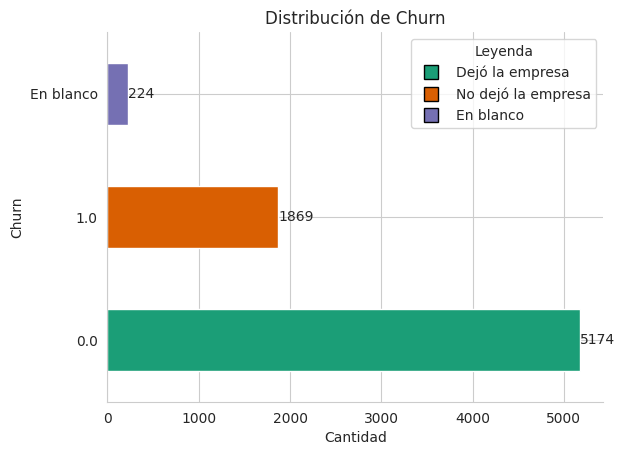

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# Contar valores, incluyendo NaN como "Sin dato"
conteo = df_final['Churn'].fillna('En blanco').value_counts()

# Graficar
ax = conteo.plot(
    kind='barh',
    color=sns.palettes.mpl_palette('Dark2')
)

# Etiquetas de cantidad en cada barra
for i, valor in enumerate(conteo):
    ax.text(valor + 0.5, i, str(valor), va='center')

# Quitar bordes superiores y derecho
ax.spines[['top', 'right']].set_visible(False)

# Etiquetas y título
plt.xlabel('Cantidad')
plt.ylabel('Churn')
plt.title('Distribución de Churn')

# Leyenda personalizada
plt.legend(
    handles=[
        plt.Line2D([0], [0], color='black', lw=0, marker='s', markersize=10, markerfacecolor=sns.color_palette('Dark2')[0], label='Dejó la empresa'),
        plt.Line2D([0], [0], color='black', lw=0, marker='s', markersize=10, markerfacecolor=sns.color_palette('Dark2')[1], label='No dejó la empresa'),
        plt.Line2D([0], [0], color='black', lw=0, marker='s', markersize=10, markerfacecolor=sns.color_palette('Dark2')[2], label='En blanco')
    ],
    title="Leyenda"
)

plt.show()


#Recuento de evasión por variables categóricas

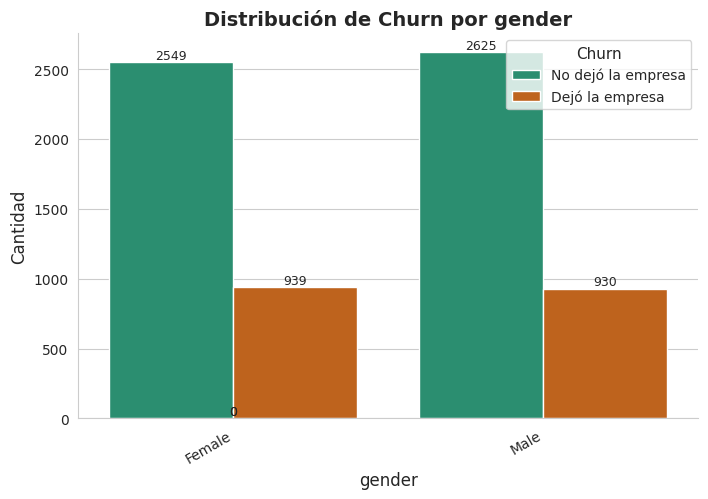

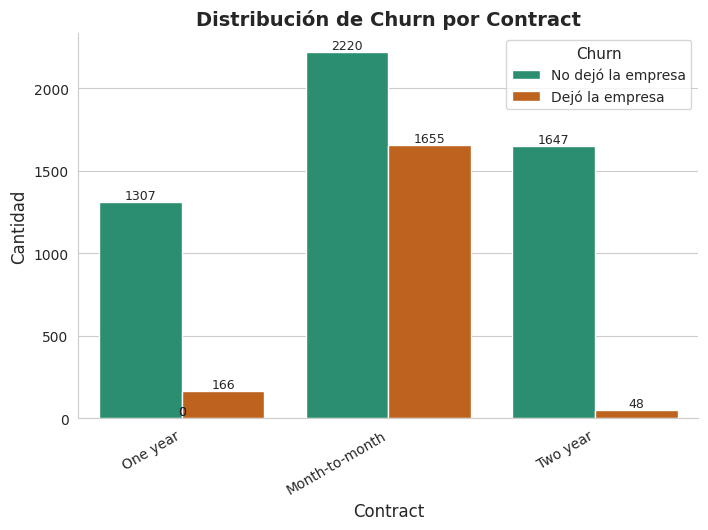

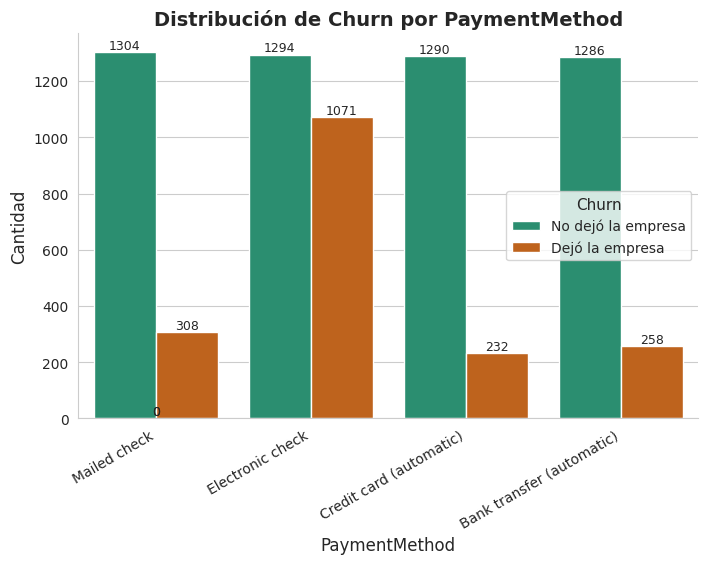

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

variables_categoricas = ['gender', 'Contract', 'PaymentMethod']

for i, col in enumerate(variables_categoricas, start=1):
    fig, ax = plt.subplots(figsize=(8, 5))

    sns.countplot(
        data=df_final,
        x=col,
        hue='Churn',
        palette='Dark2',
        ax=ax
    )

    # Etiquetas de cantidad
    for p in ax.patches:
        ax.annotate(
            f'{int(p.get_height())}',
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='bottom', fontsize=9
        )

    ax.set_title(f'Distribución de Churn por {col}', fontsize=14, fontweight='bold')
    ax.set_ylabel('Cantidad', fontsize=12)
    ax.set_xlabel(col, fontsize=12)

    ax.legend(
        title='Churn',
        labels=['No dejó la empresa', 'Dejó la empresa'],
        fontsize=10,
        title_fontsize=11
    )

    # Rotar etiquetas del eje X sin warnings
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

    # Quitar bordes superiores y derechos
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.show()

    # Separador visual en la salida
    print("\n" + "="*92 + "\n")


#Conteo de evasión por variables numéricas

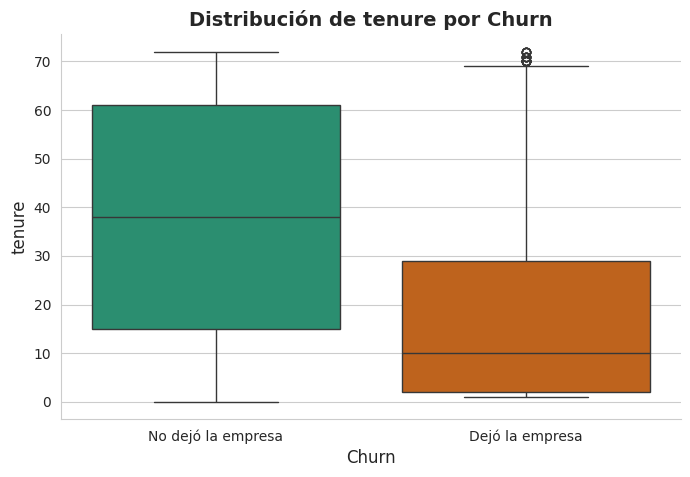

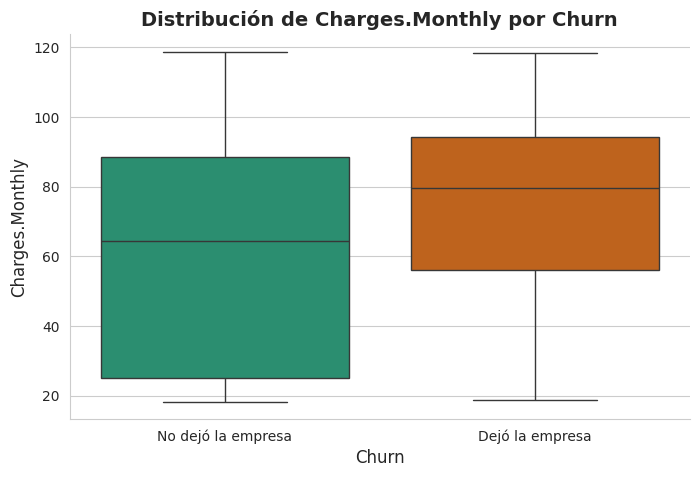

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

variables_numericas = ['tenure', 'Charges.Monthly']

for col in variables_numericas:
    fig, ax = plt.subplots(figsize=(8, 5))

    sns.boxplot(
        data=df_final,
        x='Churn',
        y=col,
        hue='Churn',          # ahora explícito
        palette='Dark2',
        dodge=False,          # para que no se separe en dos cajas
        legend=False,         # evita duplicar leyenda
        ax=ax
    )

    ax.set_title(f'Distribución de {col} por Churn', fontsize=14, fontweight='bold')
    ax.set_xlabel('Churn', fontsize=12)
    ax.set_ylabel(col, fontsize=12)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['No dejó la empresa', 'Dejó la empresa'])

    # Quitar bordes superiores y derechos
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.show()
    print("\n" + "="*92 + "\n")


                    Churn  Cuentas_diarias  Charges.Monthly    tenure
Churn            1.000000         0.193356         0.193356 -0.352229
Cuentas_diarias  0.193356         1.000000         1.000000  0.247982
Charges.Monthly  0.193356         1.000000         1.000000  0.247982
tenure          -0.352229         0.247982         0.247982  1.000000


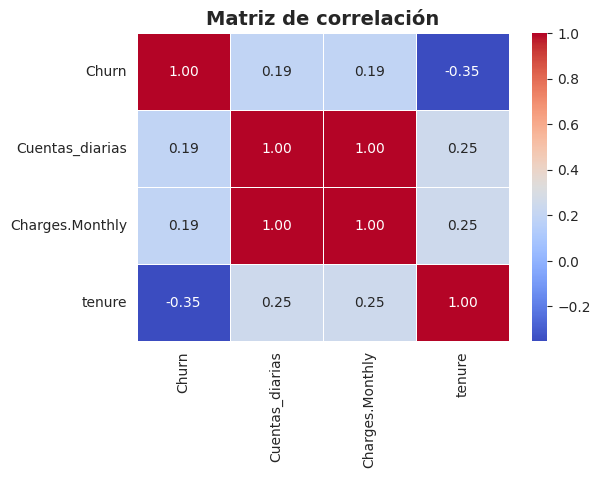

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionamos variables numéricas relevantes
variables_correlacion = [
    'Churn', 'Cuentas_diarias', 'Charges.Monthly', 'tenure'
]

# Calculamos la matriz de correlaciones
matriz_corr = df_final[variables_correlacion].corr()

# Mostramos la matriz como tabla
print(matriz_corr)

# Visualizamos con un mapa de calor
plt.figure(figsize=(6, 4))
sns.heatmap(
    matriz_corr,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5
)
plt.title("Matriz de correlación", fontsize=14, fontweight='bold')
plt.show()


In [ ]:
**Hallazgos:**
- `tenure` presenta correlación negativa con Churn: a menor antigüedad, mayor probabilidad de evasión.
- `Charges.Monthly` tiene correlación positiva moderada con Churn, indicando que cargos más altos tienden a asociarse con clientes que se van.
- `Cuentas_diarias` muestra una ligera correlación positiva con Churn, lo que sugiere que el nivel de actividad diaria podría estar relacionado con la evasión.
- El número total de **servicios contratados** presenta un patrón claro: los clientes con menos servicios tienen mayor tasa de Churn.


#📄Informe final


## 1. Introducción
El objetivo de este análisis es comprender los factores que influyen en la **evasión de clientes** (Churn) en la empresa de telecomunicaciones.  
El *Churn* se refiere a los clientes que han decidido **cancelar su contrato o servicio**.  
Identificar patrones y variables asociadas a este fenómeno es clave para **diseñar estrategias de retención** que reduzcan la pérdida de clientes y aumenten la rentabilidad en la empresa que se está analizando.

---

## 2. Limpieza y Tratamiento de Datos
Se realizaron los siguientes pasos:

1. **Importación de datos** desde el archivo json.
2. **Inspección inicial** para conocer el tipo y calidad de las variables.
3. Se normalizaron las columnas del DataFrame
4. Conversión de columnas a los tipos correctos:
   - `Charges.Total` pasó de *object* a *float*.
   - `Churn` se trató como variable categórica binaria (0 = No dejó la empresa, 1 = Dejó la empresa).

---

## 3. Análisis Exploratorio de Datos (EDA)

### 3.1 Distribución general de Churn
Se analizó la proporción de clientes que dejaron la empresa frente a los que permanecieron.  
Se encontró un **porcentaje significativo de evasión**, lo que justifica estrategias proactivas de retención.

---

### 3.2 Variables categóricas
Se exploró cómo el Churn varía según:
- **Género**
- **Tipo de contrato**
- **Método de pago**

**Hallazgos:**
- Los clientes con contratos **mensuales** presentan tasas más altas de Churn.
- El género no mostró una diferencia significativa.
- Los que utilizan el método de pago electronic check son más propensos a dejar la empresa.

---

### 3.3 Variables numéricas
Se analizaron:
- **Meses de contrato (`tenure`)**
- **Cargos mensuales (`Charges.Monthly`)**

**Hallazgos:**
- Los clientes que se van suelen tener **menos tiempo** en la empresa.
- Los cargos mensuales más altos se relacionan con mayor evasión.

---

## 4. Conclusiones e Insights
- La **duración del contrato** es un factor clave: los clientes recientes son más propensos a irse.
- Los **contratos mensuales** y ciertos métodos de pago electrónicos aumentan la probabilidad de evasión.
- El género no es un determinante fuerte en este caso.

---

## 5. Recomendaciones
1. **Incentivar contratos a largo plazo** mediante descuentos o beneficios adicionales.
2. **Revisar la estructura de precios** para clientes con cargos mensuales altos y ofrecer planes personalizados.
3. **Monitorear métodos de pago asociados a mayor evasión** y aplicar campañas de fidelización específicas.
4. **Implementar programas de bienvenida y retención** para clientes con menos de 6 meses en la empresa.
5. **Realizar encuestas de satisfacción** para identificar problemas de servicio y resolverlos antes de que se produzca el Churn.

---
